In [31]:
import numpy as np
import matplotlib.pyplot as plt
# dimensiones de la placa
Lx = 10; Ly = 10
dx = 1; dy = dx
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)

T = np.zeros([np.size(y),np.size(x)])+1e-4
dTdx = np.zeros([np.size(y),np.size(x)])
dTdy = np.zeros([np.size(y),np.size(x)])
Tviejo = np.zeros([np.size(y),np.size(x)])
# Condiciones de frontera de Dirichlet
T[-1]=100
T[:,-1] = 75

# condiciones de neumann
k = 0.5
qx0 = 0
qy0 = -10
dTdx[:,0]=-qx0/k
dTdy[0,:]=-qy0/k

In [32]:
error = 1
while (error > 0.01):
    Tviejo[:][:] = T[:][:]
    for j in np.arange(0,y.size-1):
        for i in np.arange(0,x.size-1):
            if i == 0 & j == 0:
                T[j][i]= (2*T[j][i+1]-2*dx*dTdx[j][i]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            elif i==0 & j !=0:
                T[j][i]= (2*T[j][i+1]-2*dx*dTdx[j][i]+T[j+1][i]+T[j-1][i])/4
            elif i!=0 & j == 0:
                T[j][i]= (T[j][i+1]+T[j][i-1]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            else:
                T[j][i]= (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4
    
    E = np.abs((T-Tviejo)/T)
    error = E.max()


In [33]:
T

array([[ 79.40702647,  79.48785408,  79.39540701,  79.06692269,
         78.37264303,  77.11555269,  75.06615937,  72.10009927,
         68.61633054,  66.81547157,  75.        ],
       [ 99.78340894,  99.77424389,  99.64804251,  99.33736185,
         98.70816133,  97.54301529,  95.5411039 ,  92.36672381,
         87.77775995,  81.82324572,  75.        ],
       [ 99.90153022,  99.87669193,  99.76833873,  99.5139208 ,
         98.98629109,  97.96699366,  96.13017104,  93.07528141,
         88.46098203,  82.25767565,  75.        ],
       [ 99.9469392 ,  99.92613052,  99.84603782,  99.6532656 ,
         99.23365836,  98.37656353,  96.73959586,  93.85515379,
         89.25554192,  82.78486737,  75.        ],
       [ 99.97079516,  99.95683033,  99.90299129,  99.76702728,
         99.45258656,  98.76659306,  97.3633764 ,  94.71275651,
         90.19107898,  83.44196441,  75.        ],
       [ 99.9851091 ,  99.97688052,  99.94411667,  99.85629944,
         99.63838036,  99.12521308,  97.9

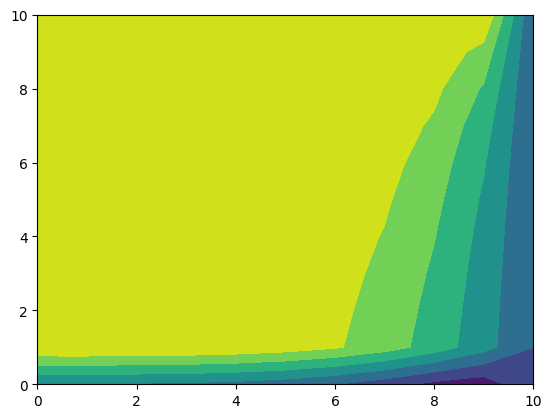

In [34]:
X, Y = np.meshgrid(x,y)
plt.contourf(X,Y,T)